In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.max_rows = 4000

In [2]:
fname="distance_num_sde.csv"
df = pd.read_csv(fname)
## patientcounts number of patients in cluster_0
df["patientcounts"] = [7774,15459,4509,15869,3980,4865,5392,3719,11387,4480,7161,2154,4865]
df["Name"] = ["Hydralazine","Metoprolol","Vancomycin","Magnesium","Coumadin","Propofol","Plavix","Zosyn","Pantoprazole","Hydromorphone","Ipratropium","Furosemide","Coumadin"]
df["norm_SIDER"] = df["SIDER"]/df["patientcounts"] #IGNORE
## normalize # diseases diveided by num paitents given the drug
df['norm_ES_CM_CBOTH'] = df['ES_NS_CM_CBOTH']/df["patientcounts"]
df['norm_ES_UN_CBOTH'] = df['ES_NS_UN_CBOTH']/df["patientcounts"]
df['norm_ES_S_CM_CBOTH'] = df['ES_S_CM_CBOTH']/df["patientcounts"]
df['norm_ES_S_UN_CBOTH'] = df['ES_S_UN_CBOTH']/df["patientcounts"]

In [3]:
df = df.drop([9,12]) #some problem with Hydromorphone and didn't want Coumadin (different dose) twice

In [4]:
df.columns

Index(['RXNORM', 'D_EN_N', 'D_EN_M', 'D_EN_Q', 'ND_EN_N', 'ND_EN_M', 'ND_EN_Q',
       'S_EN_N', 'S_EN_M', 'S_EN_Q', 'NS_EN_N', 'NS_EN_M', 'NS_EN_Q', 'D_ES_N',
       'D_ES_M', 'D_ES_Q', 'ND_ES_N', 'ND_ES_M', 'ND_ES_Q', 'S_ES_N', 'S_ES_M',
       'S_ES_Q', 'NS_ES_N', 'NS_ES_M', 'NS_ES_Q', 'D_DS_N', 'D_DS_M', 'D_DS_Q',
       'ND_DS_N', 'ND_DS_M', 'ND_DS_Q', 'S_DS_N', 'S_DS_M', 'S_DS_Q',
       'NS_DS_N', 'NS_DS_M', 'NS_DS_Q', 'DS_NS_CM_C0', 'DS_NS_CM_C1',
       'DS_NS_CM_CBOTH', 'DS_NS_UN_C0', 'DS_NS_UN_C1', 'DS_NS_UN_CBOTH',
       'DS_S_CM_C0', 'DS_S_CM_C1', 'DS_S_CM_CBOTH', 'DS_S_UN_C0', 'DS_S_UN_C1',
       'DS_S_UN_CBOTH', 'EN_NS_CM_C0', 'EN_NS_CM_C1', 'EN_NS_CM_CBOTH',
       'EN_NS_UN_C0', 'EN_NS_UN_C1', 'EN_NS_UN_CBOTH', 'EN_S_CM_C0',
       'EN_S_CM_C1', 'EN_S_CM_CBOTH', 'EN_S_UN_C0', 'EN_S_UN_C1',
       'EN_S_UN_CBOTH', 'ES_NS_CM_C0', 'ES_NS_CM_C1', 'ES_NS_CM_CBOTH',
       'ES_NS_UN_C0', 'ES_NS_UN_C1', 'ES_NS_UN_CBOTH', 'ES_S_CM_C0',
       'ES_S_CM_C1', 'ES_S_CM_CBOTH', '

In [5]:
df['ES_S_CM_CBOTH'].describe()

count     11.000000
mean      73.636364
std       67.985694
min        4.000000
25%       31.000000
50%       59.000000
75%       86.500000
max      248.000000
Name: ES_S_CM_CBOTH, dtype: float64

In [6]:
df['ES_NS_CM_CBOTH'].describe()
## more diseases indecated as side effects shown in disease

count     11.00000
mean      96.00000
std       61.95805
min       10.00000
25%       61.50000
50%       81.00000
75%      123.50000
max      248.00000
Name: ES_NS_CM_CBOTH, dtype: float64

In [1]:
#please add box-and-whiskers plot comparing ES_S_CM_CBOTH and ES_NS_CM_CBOTH
## new diseases capture more side effects signals
## new diseases as dependent variable

In [7]:
# diff of inter-cluster Q dist between new drugs and all drugs distributions when clustering is done using ES feature
# NOTE: want signals of ades, patients have similar diseases but different new diseases
df["Diff_ND-D_ES_Q"] = (df["ND_ES_Q"] - df["D_ES_Q"])
# diff of inter-cluster Q dist between new dis and all dis distributions when clustering is done using ES feature

df["Diff_NS-S_ES_Q"] = (df["NS_ES_Q"] - df["S_ES_Q"])

#sum of Q dist new dis distributions and Q dist new drug distributions when clustering is done using ES feature
# NOTE: both are high
df["Sum_NS+ND_ES_Q"] = (df["NS_ES_Q"] + df["ND_ES_Q"])

#sum of the two differences, measure singals of ade
df["2sum"] = df["Diff_NS-S_ES_Q"] + df["Diff_ND-D_ES_Q"]


In [ ]:
df.sort_values(by=["Sum_NS+ND_ES_Q"])

In [ ]:
df.sort_values(by=["norm_SIDER"])

In [ ]:
df.sort_values(by=['2sum'])

In [ ]:
plt.scatter(df["2sum"], df["norm_SIDER"])
plt.show()

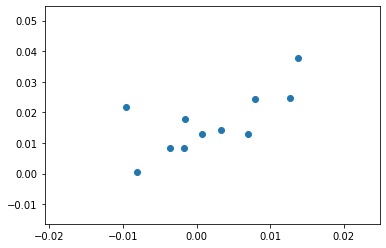

In [8]:
# improve the plot - axis labels, med names, font size
plt.scatter(df["2sum"], df["norm_ES_CM_CBOTH"])
plt.show()
# NOTE: plot better

In [ ]:
plt.scatter(df["2sum"], df["norm_ES_UN_CBOTH"])
plt.show()

In [ ]:
plt.scatter(df["Sum_NS+ND_ES_Q"], df["norm_SIDER"])
plt.show()

In [ ]:
plt.scatter(df["Sum_NS+ND_ES_Q"], df["norm_ES_UN_CBOTH"])
plt.show()

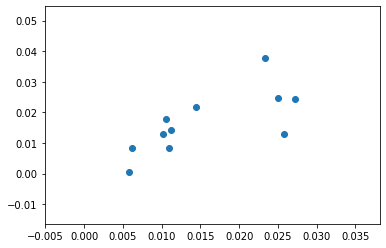

In [9]:
# improve the plot - axis labels, med names, font size
plt.scatter(df["Sum_NS+ND_ES_Q"], df["norm_ES_CM_CBOTH"])
plt.show()

In [ ]:
# we will show the above 2 correlation plots along with 1 Wasserstein distance plot (fig. 9 in overleaf) modified
# in the following manner: use only ES feature and in a single graph, show S, NS, D, DS for Q dist and N dist. different entites using different patterns, yuanquan fangkuai xingxing
# All the N dist plots will overlap and so there will just be one blue line
# the 4 Q dist plots should be in different colours

In [10]:
df["2sum"].corr(df["norm_SIDER"],method='spearman')

0.6454545454545455

In [11]:
df["2sum"].corr(df["norm_ES_CM_CBOTH"],method='spearman')

0.6818181818181819

In [12]:
df["2sum"].corr(df["norm_ES_UN_CBOTH"],method='spearman')

0.7454545454545456

In [13]:
df["Sum_NS+ND_ES_Q"].corr(df["norm_SIDER"],method='spearman')

0.7090909090909092

In [14]:
df["Sum_NS+ND_ES_Q"].corr(df["norm_ES_CM_CBOTH"],method='spearman')

0.7272727272727273

In [15]:
df["Sum_NS+ND_ES_Q"].corr(df['norm_ES_UN_CBOTH'],method='spearman')

0.8363636363636365

In [ ]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr(method='spearman')
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates().dropna()
    return xFlattened

## CLUSTER phenotypes can provides some signals to ADE

In [ ]:
corrFilter(df, .8)